In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [289]:
df = pd.read_csv("credit_risk_dataset.csv")

In [290]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [292]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [293]:
columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file','loan_status']
for i in columns:
    print( i + '=', df[i].unique())

person_home_ownership= ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent= ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade= ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file= ['Y' 'N']
loan_status= [1 0]


In [294]:
print(df[df.duplicated()])

       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [295]:
df.duplicated().sum()

165

In [296]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [297]:
df.duplicated().sum()

0

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [299]:
#get all the numerica features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_features))

Number of numerical features:  8


In [300]:
num_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [301]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [302]:
df[num_features].corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.163001,0.050680,0.011760,-0.022698,-0.042300,0.859215
person_income,0.173293,1.000000,0.133903,0.265947,0.000878,-0.145005,-0.254472,0.117614
person_emp_length,0.163001,0.133903,1.000000,0.113183,-0.056607,-0.082817,-0.053999,0.144889
loan_amnt,0.050680,0.265947,0.113183,1.000000,0.146937,0.105736,0.572824,0.041865
loan_int_rate,0.011760,0.000878,-0.056607,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.022698,-0.145005,-0.082817,0.105736,0.335853,1.000000,0.379697,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.053999,0.572824,0.120207,0.379697,1.000000,-0.031457
cb_person_cred_hist_length,0.859215,0.117614,0.144889,0.041865,0.015896,-0.016498,-0.031457,1.000000


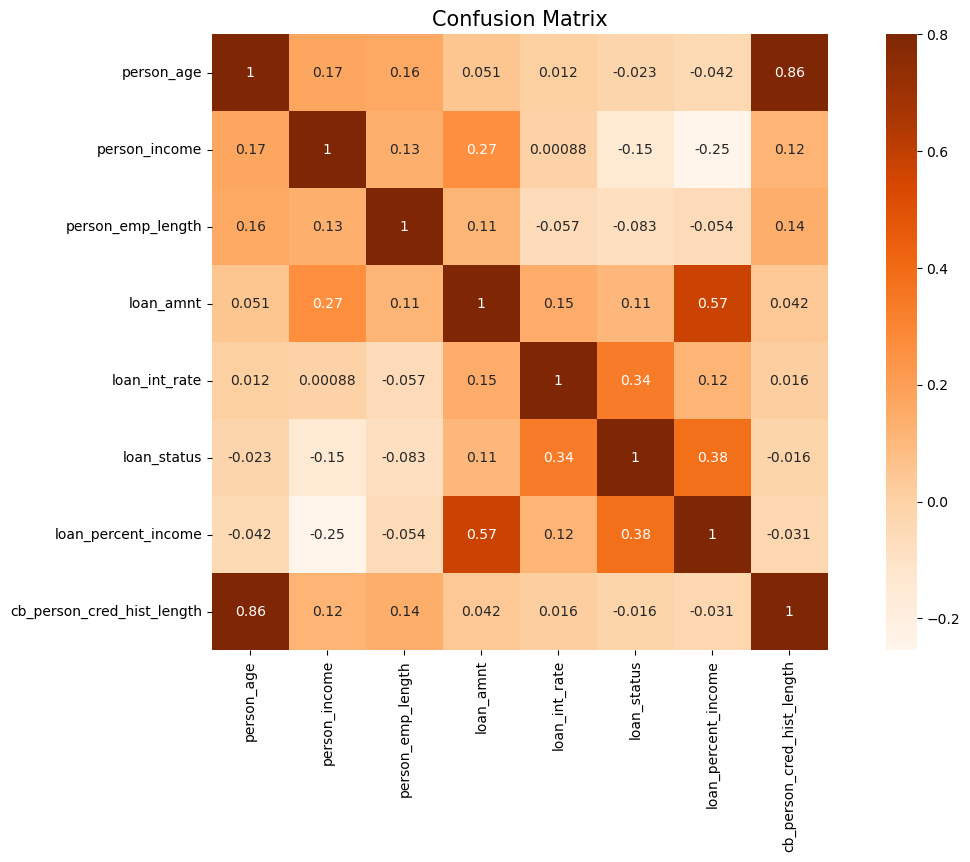

In [303]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df[num_features].corr(), vmax =.8, square = True, annot = True,cmap='Oranges' )
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [304]:
# flag missing interest rate
df['loan_int_rate_missing'] = df['loan_int_rate'].isna().astype(int)

In [305]:
# grade-based median imputation
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate']\
                         .transform(lambda x: x.fillna(x.median()))

In [306]:
# flag missing employement length
df['emp_length_missing'] = df['person_emp_length'].isna().astype(int)

In [307]:
#fill na with medians for person_emp_length due to weak correlations
df['person_emp_length'] = df['person_emp_length'].fillna(
    df['person_emp_length'].median()
)


In [308]:
def plot_boxplots(df, columns):
    """
    Plots boxplots for all numerical columns in the list `columns`
    """
    n_cols = 3 
    n_rows = math.ceil(len(columns) / n_cols)

    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()


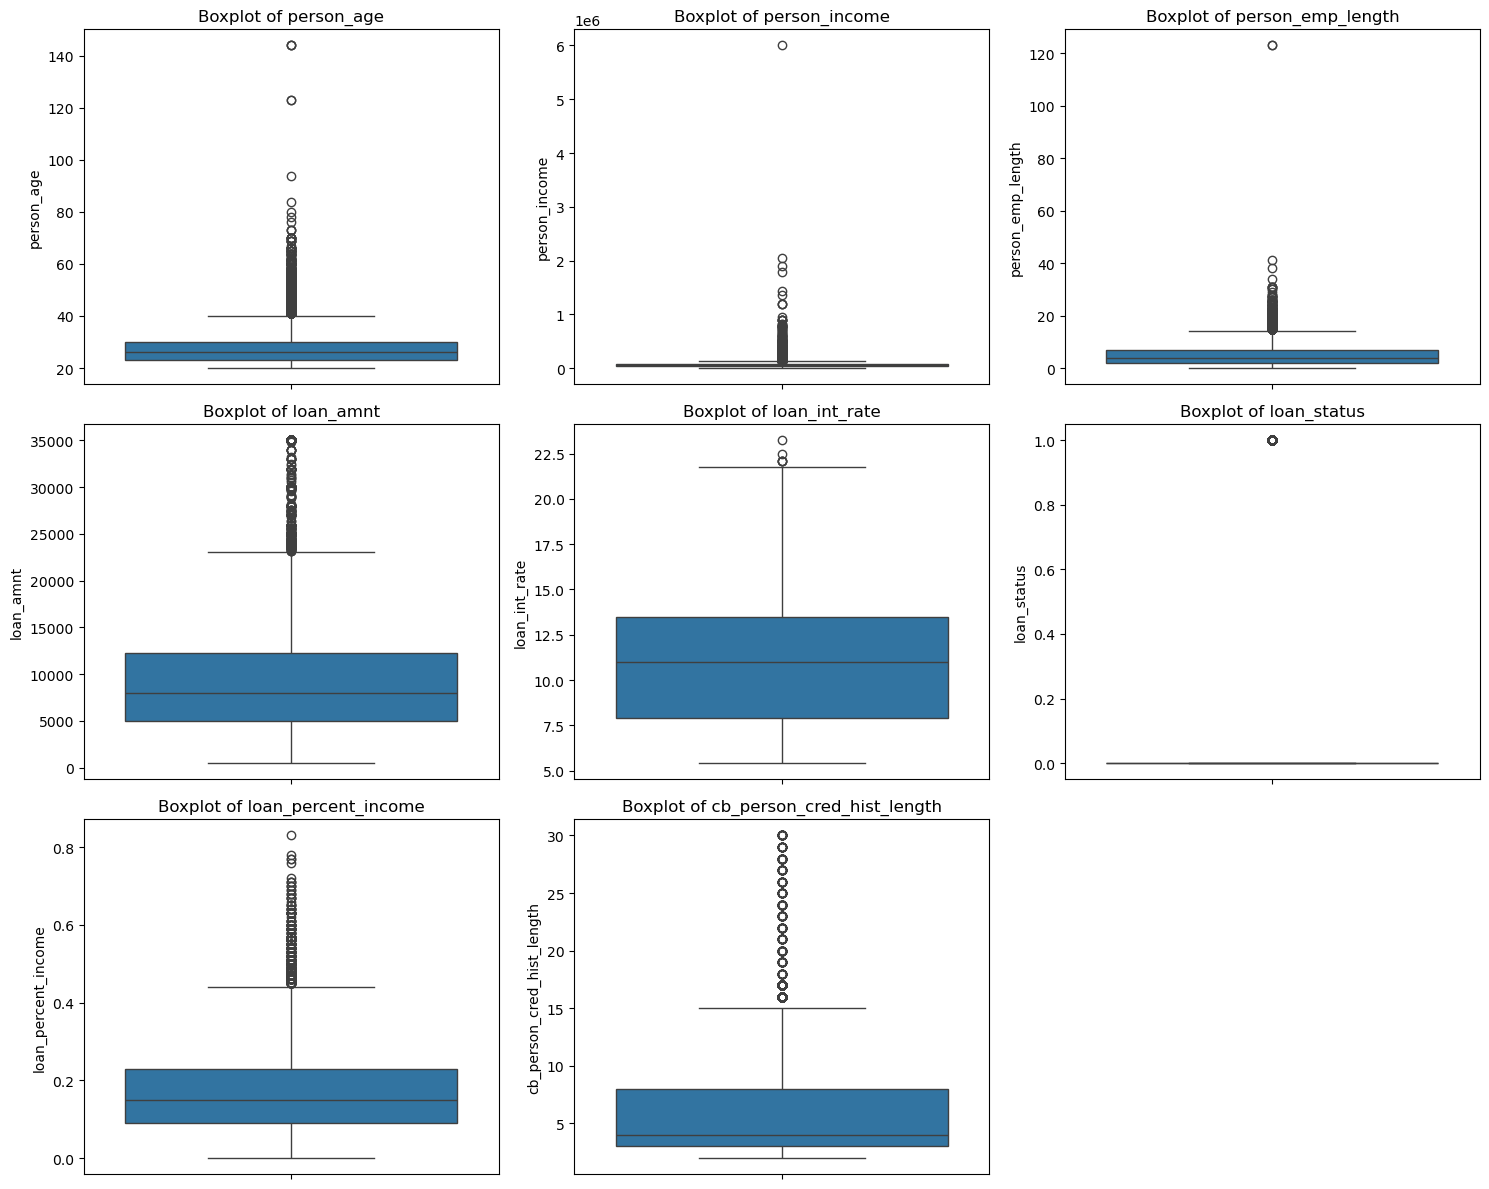

In [309]:
plot_boxplots(df,num_features)

In [310]:
df = df[df['person_age']<=80]
df = df[df['person_emp_length']<=65]

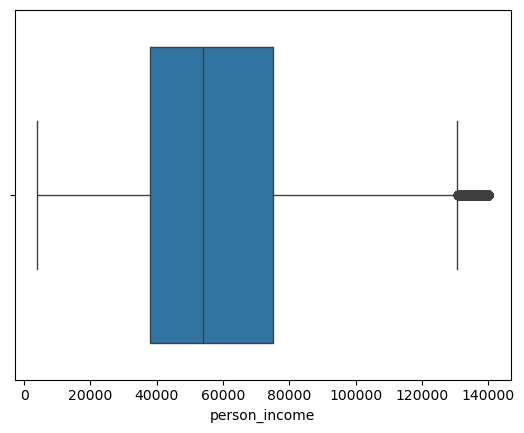

In [311]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['person_income']<(Q1-1.5*IQR))|(df['person_income']>(Q3+1.5*IQR)))]
# visualisasi outlier
sns.boxplot(x=df['person_income'])
plt.show()

In [312]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_int_rate_missing,emp_length_missing
count,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000
mean,27.601494,58719.169140,4.685029,9292.801377,11.006571,0.224485,0.174360,5.732874,0.095561,0.028222
std,6.135366,27515.670062,3.906049,6037.596590,3.210247,0.417250,0.107057,4.008670,0.293994,0.165610
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000,0.000000,0.000000
25%,23.000000,38000.000000,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000,0.000000,0.000000
50%,26.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000
75%,30.000000,75000.000000,7.000000,12000.000000,13.480000,0.000000,0.230000,8.000000,0.000000,0.000000
max,80.000000,140004.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000


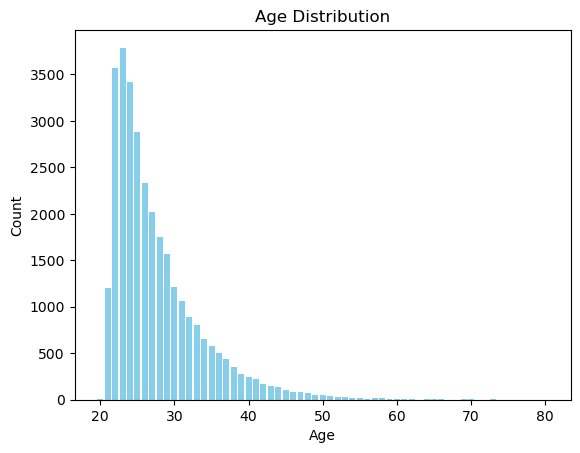

In [313]:
age_counts = df['person_age'].value_counts()
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

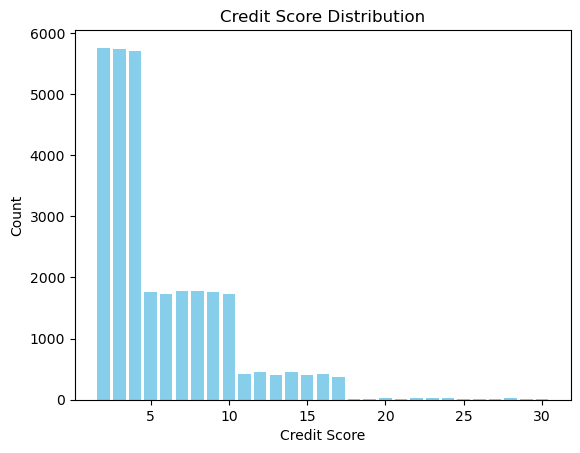

In [314]:
credit_user = df['cb_person_cred_hist_length'].value_counts()
plt.bar(credit_user.index, credit_user.values, color='skyblue')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution')
plt.show()

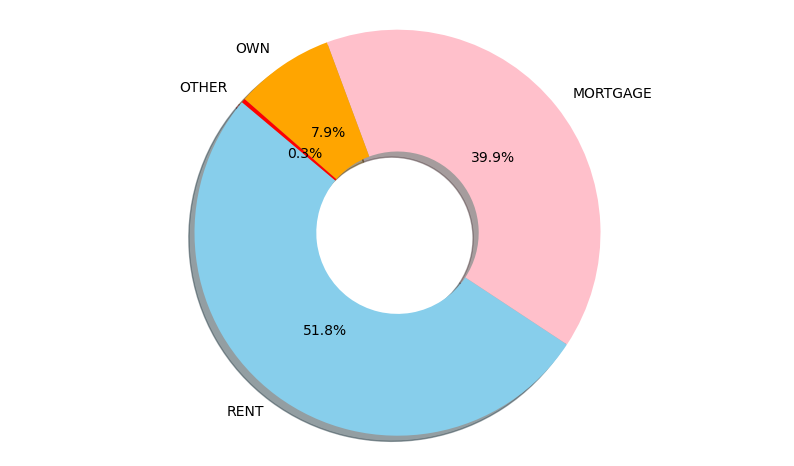

In [315]:
marital_counts = df['person_home_ownership'].value_counts()

colors = ['skyblue', 'pink', 'orange', 'red']
plt.figure(figsize=(10, 5.8))
plt.pie(marital_counts.values, labels=marital_counts.index, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.6))
plt.axis('equal')
plt.show()

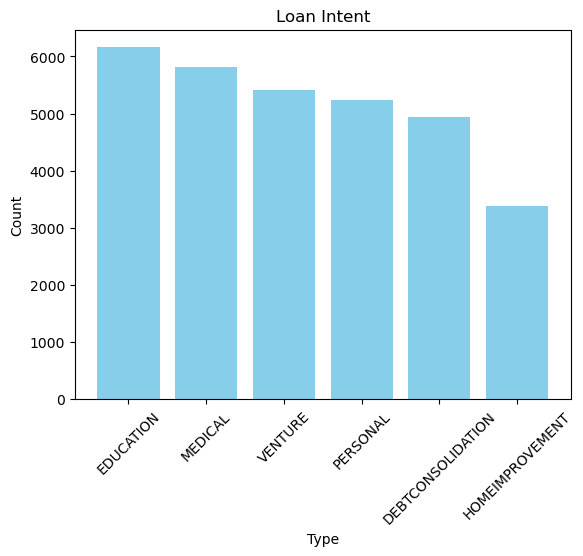

In [316]:
loan = df['loan_intent'].value_counts()
plt.bar(loan.index, loan.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Loan Intent')
plt.show()

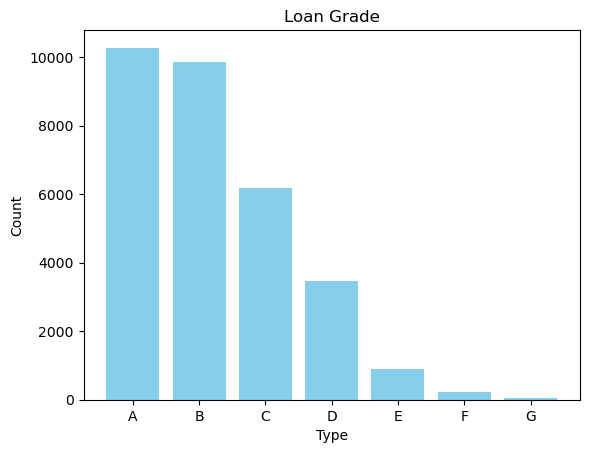

In [317]:
grade = df['loan_grade'].value_counts()
plt.bar(grade.index, grade.values, color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Loan Grade')
plt.show()

Summary Analysis by Visualization Data
1. The majority of age loaners within the 20–30 age range.
2. The loaners performs low credit scores ranging from 2 to 4.
3. The loaners commonly having home by rent
4. The majority loaners are classified as Grade A or B

In [318]:
#categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features: ', len(cat_features))

Number of categorical features:  4


In [319]:
#discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  1


In [320]:
#continous features
continous_features = [feature for feature in num_features if feature not in discrete_features]
print('Number of continous features: ', len(continous_features))

Number of continous features:  7


In [321]:
continous_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [322]:
cat_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [323]:
df['person_home_ownership'].value_counts()


person_home_ownership
RENT        16033
MORTGAGE    12352
OWN          2449
OTHER          99
Name: count, dtype: int64

In [324]:
df['loan_intent'].value_counts()


loan_intent
EDUCATION            6160
MEDICAL              5816
VENTURE              5409
PERSONAL             5236
DEBTCONSOLIDATION    4933
HOMEIMPROVEMENT      3379
Name: count, dtype: int64

In [325]:
df['loan_grade'].value_counts()


loan_grade
A    10270
B     9862
C     6170
D     3452
E      898
F      221
G       60
Name: count, dtype: int64

In [326]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    25478
Y     5455
Name: count, dtype: int64

In [327]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt'] 

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

In [328]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_int_rate_missing', 'emp_length_missing', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [329]:
#categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features: ', len(cat_features))

Number of categorical features:  4


In [330]:
#get all the numerica features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_features))

Number of numerical features:  13


In [331]:
num_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_int_rate_missing',
 'emp_length_missing',
 'loan_to_income_ratio',
 'loan_to_emp_length_ratio',
 'int_rate_to_loan_amt_ratio']

In [332]:
from sklearn.model_selection import train_test_split
X = df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [333]:
#separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((24746, 16), (6187, 16))